# Science User Case - Inspecting a Candidate List

Ogle et al. (2016) mined the NASA/IPAC Extragalactic Database (NED) to identify a new type of galaxy: Superluminous Spiral Galaxies.

Here's the paper: https://ui.adsabs.harvard.edu//#abs/2016ApJ...817..109O/abstract

Table 1 lists the positions of these Super Spirals. Based on those positions, let's create multiwavelength cutouts for each super spiral to see what is unique about this new class of objects.

## 1. Import the Python modules we'll be using.

In [1]:
# Suppress unimportant warnings.
import warnings
warnings.filterwarnings("ignore", module="astropy.io.votable.*")
warnings.filterwarnings("ignore", module="pyvo.utils.xml.*")
warnings.filterwarnings('ignore', '.*RADECSYS=*', append=True)

import matplotlib.pyplot as plt
import numpy as np

# For downloading files
from astropy.utils.data import download_file

from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.nddata import Cutout2D
import astropy.visualization as vis
from astropy.wcs import WCS
from astroquery.ned import Ned

import pyvo as vo

The next cell prepares the notebook to display our visualizations.

In [2]:
%matplotlib inline  

## 2. Search NED for objects in this paper.

Insert a Code Cell below by clicking on the "Insert" Menu and choosing "Insert Cell Below". Then consult QuickReference.md to figure out how to use astroquery to search NED for all objects in a paper, based on the refcode of the paper. Inspect the resulting astropy table.

In [3]:
objects_in_paper = Ned.query_refcode('2016ApJ...817..109O')
objects_in_paper.show_in_notebook()

idx,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
0,1,WISEA J001550.14-100242.3,3.95892,-10.04511,G,52788.0,0.176083,,17.5g,--,10,0,63,7,4,10,0
1,2,WISEA J003807.80-010936.7,9.53252,-1.16024,G,62565.0,0.208695,,18.0g,--,11,0,71,10,5,10,0
2,3,WISEA J040422.92-054134.8,61.09548,-5.69303,G,75138.0,0.250635,,18.6g,--,5,0,61,10,6,8,0
3,4,WISEA J073806.16+282359.6,114.52568,28.39995,G,69255.0,0.23101,,18.0g,--,8,0,66,7,4,10,0
4,5,2MASX J07550424+1353261,118.76776,13.89065,G,66754.0,0.222669,,18.5g,--,7,0,38,6,4,6,0
5,6,WISEA J082655.11+181147.7,126.72969,18.19665,G,79608.0,0.265543,,18.4g,--,4,0,46,6,4,6,0
6,7,2MASX J08542169+0449308,133.59033,4.82511,G,47018.0,0.156835,,16.7g,--,12,0,58,7,4,10,0
7,8,WHL J090944.8+222607,137.4367,22.43539,GClstr,90837.0,0.303,PHOT,,--,5,0,0,4,5,0,0
8,9,2MASX J09094480+2226078,137.4367,22.43538,G,85557.0,0.285386,,19.0g,--,6,0,30,5,6,6,0


## 3. Filter the NED results.

The results from NED will include galaxies, but also other kinds of objects. Print the 'Type' column to see the full range of classifications. Next, print the 'Type' of just the first source in the table, in order to determine its data type (since Python 3 distinguishes between strings and byte strings). Finally, use the data type information to filter the results so that we only keep the galaxies in the list.

In [4]:
objects_in_paper['Type']

G
G
G
G
G
G
G
GClstr
G
G
GClstr


In [5]:
# Let's see whether we are dealing with strings or byte strings
objects_in_paper[0]['Type']

b'G'

In [6]:
# Byte strings it is!
galaxies = objects_in_paper[objects_in_paper['Type'] == b'G']

galaxies.show_in_notebook()

idx,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
0,1,WISEA J001550.14-100242.3,3.95892,-10.04511,G,52788.0,0.176083,,17.5g,--,10,0,63,7,4,10,0
1,2,WISEA J003807.80-010936.7,9.53252,-1.16024,G,62565.0,0.208695,,18.0g,--,11,0,71,10,5,10,0
2,3,WISEA J040422.92-054134.8,61.09548,-5.69303,G,75138.0,0.250635,,18.6g,--,5,0,61,10,6,8,0
3,4,WISEA J073806.16+282359.6,114.52568,28.39995,G,69255.0,0.23101,,18.0g,--,8,0,66,7,4,10,0
4,5,2MASX J07550424+1353261,118.76776,13.89065,G,66754.0,0.222669,,18.5g,--,7,0,38,6,4,6,0
5,6,WISEA J082655.11+181147.7,126.72969,18.19665,G,79608.0,0.265543,,18.4g,--,4,0,46,6,4,6,0
6,7,2MASX J08542169+0449308,133.59033,4.82511,G,47018.0,0.156835,,16.7g,--,12,0,58,7,4,10,0
7,9,2MASX J09094480+2226078,137.4367,22.43538,G,85557.0,0.285386,,19.0g,--,6,0,30,5,6,6,0
8,10,2MASX J09260805+2405242,141.53357,24.09004,G,66689.0,0.222451,,17.8g,--,12,0,32,6,7,6,0


## 4. Search the NAVO Registry for image resources.

The paper selected super spirals using WISE, SDSS, and GALEX images. Search the NAVO registry for all image resources, using the 'service_type' search parameter. How many image resources are currently available?

In [7]:
image_services = vo.regsearch(servicetype='image')

print(f'{len(image_services)} result(s) found.')

image_services.to_table()['ivoid', 'short_name', 'res_title']

308 result(s) found.


ivoid,short_name,res_title
object,object,object
ivo://3crsnapshots/sia,3CRSnap.sia,3CRSnapshots Simple Image Access Service
ivo://3crsnapshots/sia,3CRSnap.sia,3CRSnapshots Simple Image Access Service
ivo://archive.stsci.edu/borg,BoRG,Brightest of Reionizing Galaxies (BoRG)
ivo://archive.stsci.edu/ghosts,GHOSTS,"Galaxy Halos, Outer disks, Substructure, Thick disks and Star clusters (GHOSTS)"
ivo://archive.stsci.edu/sia/galex,GALEX,Galaxy Evolution Explorer
ivo://archive.stsci.edu/siap/hla,HLA,Hubble Legacy Archive
ivo://arvo/siap,ArVO SIAP,Armenian Virtual Observatory SIAP
ivo://cadc.nrc.ca/sia,,CADC Image Search (SIA)
ivo://cds.vizier/siap,VizieR SIA,VizieR SIA service


## 5. Search the NAVO Registry for image resources that will allow you to search for AllWISE images.

There are hundreds of image resources...too many to quickly read through. Try adding the 'keywords' search parameter to your registry search, and find the image resource you would need to search the AllWISE images. Remember from the Known Issues that 'keywords' must be a list.

In [8]:
allwise_image_services = vo.regsearch(servicetype='image', keywords=['allwise'])

print(f'{len(allwise_image_services)} result(s) found.')

allwise_image_services.to_table()['ivoid', 'short_name', 'res_title']

1 result(s) found.


ivoid,short_name,res_title
object,object,object
ivo://irsa.ipac/wise/images/allwise/l3a,AllWISE L3a,AllWISE Atlas (L3a) Coadd Images


## 6. Choose the AllWISE image service that you are interested in.

In [9]:
allwise_image_service = allwise_image_services[0]
allwise_image_service.service

## 7. Choose one of the galaxies in the NED list.


In [10]:
ra = galaxies['RA'][0]
dec = galaxies['DEC'][0]
pos = SkyCoord(ra, dec, unit = 'deg')

## 8. Search for a list of AllWISE images that cover this galaxy.

How many images are returned? Which are you most interested in?

In [11]:
allwise_image_table = allwise_image_service.search(pos=pos, size=0)
allwise_image_table

<Table length=4>
      sia_title        ...    coadd_id  
                       ...              
        object         ...     object   
---------------------- ... -------------
W1 Coadd 0046m107_ac51 ... 0046m107_ac51
W3 Coadd 0046m107_ac51 ... 0046m107_ac51
W4 Coadd 0046m107_ac51 ... 0046m107_ac51
W2 Coadd 0046m107_ac51 ... 0046m107_ac51

## 9. Use the .to_table() method to view the results as an Astropy table.

In [12]:
allwise_images = allwise_image_table.to_table()
allwise_images

sia_title,sia_url,sia_naxes,sia_fmt,sia_ra,sia_dec,sia_naxis,sia_crpix,sia_crval,sia_proj,sia_scale,sia_cd,sia_bp_id,sia_bp_ref,sia_bp_hi,sia_bp_lo,magzp,magzpunc,unc_url,cov_url,coadd_id
,,,,deg,deg,,pix,deg,,deg / pix,deg / pix,,,,,,,,,
object,object,int32,object,float64,float64,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,object,object,object
W1 Coadd 0046m107_ac51,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w1-int-3.fits,2,image/fits,4.61538,-10.601111,[4095 4095],[2048.0 2048.0],[4.61538 -10.601111],SIN,[-0.0003819444391411 0.0003819444391411],[-0.0003819444391411 -0.0 -0.0 0.0003819444391411],W1,3.35e-06,3.78e-06,3.13e-06,20.5,0.006,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w1-unc-3.fits.gz,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w1-cov-3.fits.gz,0046m107_ac51
W3 Coadd 0046m107_ac51,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w3-int-3.fits,2,image/fits,4.61538,-10.601111,[4095 4095],[2048.0 2048.0],[4.61538 -10.601111],SIN,[-0.0003819444391411 0.0003819444391411],[-0.0003819444391411 -0.0 -0.0 0.0003819444391411],W3,1.156e-05,1.627e-05,7.6e-06,18.0,0.012,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w3-unc-3.fits.gz,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w3-cov-3.fits.gz,0046m107_ac51
W4 Coadd 0046m107_ac51,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w4-int-3.fits,2,image/fits,4.61538,-10.601111,[4095 4095],[2048.0 2048.0],[4.61538 -10.601111],SIN,[-0.0003819444391411 0.0003819444391411],[-0.0003819444391411 -0.0 -0.0 0.0003819444391411],W4,2.209e-05,2.336e-05,1.984e-05,13.0,0.012,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w4-unc-3.fits.gz,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w4-cov-3.fits.gz,0046m107_ac51
W2 Coadd 0046m107_ac51,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w2-int-3.fits,2,image/fits,4.61538,-10.601111,[4095 4095],[2048.0 2048.0],[4.61538 -10.601111],SIN,[-0.0003819444391411 0.0003819444391411],[-0.0003819444391411 -0.0 -0.0 0.0003819444391411],W2,4.6e-06,5.19e-06,4.02e-06,19.5,0.007,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w2-unc-3.fits.gz,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w2-cov-3.fits.gz,0046m107_ac51


## 10. From the result in 8., select the first record for an image taken in WISE band W1 (3.6 micron)

Hints:
* Loop over records and test on the `.bandpass_id` attribute of each record
* Print the `.title` and `.bandpass_id` of the record you find, to verify it is the right one.

In [13]:
for allwise_image_record in allwise_image_table:
    if 'W1' in allwise_image_record.bandpass_id:
        break
print(allwise_image_record.title, allwise_image_record.bandpass_id)

W1 Coadd 0046m107_ac51 W1


## 11. Visualize this AllWISE image.

In [14]:
## If you only run this once, you can do it in memory in one line:
##  This fetches the FITS as an astropy.io.fits object in memory
#allwise_w1_image = allwise_image_record.getdataobj()
## But if you might run this notebook repeatedly with limited bandwidth, 
##  download it once and cache it.  
file_name = download_file(allwise_image_record.getdataurl(), cache=True)  
allwise_w1_image = fits.open(file_name)

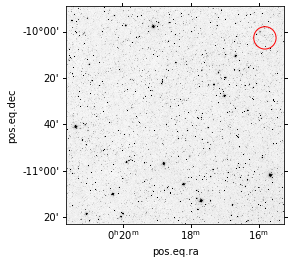

In [15]:
fig = plt.figure()

wcs = WCS(allwise_w1_image[0].header)
ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(allwise_w1_image[0].data, cmap='gray_r', origin='lower', vmax = 10)
ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')

## 12. Plot a cutout of the AllWISE image, centered on your position.

Try a 60 arcsecond cutout.

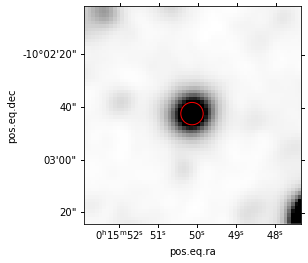

In [16]:
size = 60
cutout = Cutout2D(allwise_w1_image[0].data, pos, (size, size), wcs=wcs)
wcs = cutout.wcs

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(cutout.data, cmap='gray_r', origin='lower', vmax = 10)
ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')


## 13. Try visualizing a cutout of a GALEX image that covers your position.

Repeat steps 4, 5, 6, 8 through 12 for GALEX.

In [17]:
galex_image_services = vo.regsearch(keywords=['galex'], servicetype='image')
print(f'{len(galex_image_services)} result(s) found.')
galex_image_services.to_table()['ivoid', 'short_name', 'res_title']

5 result(s) found.


ivoid,short_name,res_title
object,object,object
ivo://archive.stsci.edu/sia/galex,GALEX,Galaxy Evolution Explorer
ivo://irsa.ipac/spitzer/images/lvl,LVL,Spitzer Local Volume Legacy Survey
ivo://irsa.ipac/wise/images/z0mgs,z0MGS,The z=0 Multiwavelength Galaxy Synthesis
ivo://mast.stsci/siap/galex_atlas,GALEX_Atlas,GALEX Atlas of Nearby Galaxies
ivo://nasa.heasarc/skyview/galex,GALEX,Galaxy Explorer All Sky Survey: Near UV


In [18]:
galex_image_service = galex_image_services[0]

In [19]:
galex_image_table = galex_image_service.search(pos=pos, size=0.0, intersect='covers')

In [20]:
for i in range(len(galex_image_table)):
    if (('image/fits' in galex_image_table[i].format) and
        (galex_image_table['enrValue'][i]==2.35e-07)):
        break
galex_image_record = galex_image_table[i]
print(galex_image_record.title, galex_image_record.bandpass_id)

ais_270_sg14-nd-int.fits.gz UV


In [21]:
## See above regarding two ways to do this: 
#galex_nuv_image = fits.open(galex_image_record.getdataurl())
file_name = download_file(galex_image_record.getdataurl(), cache=True)  
galex_nuv_image=fits.open(file_name)

In [22]:
image_data = galex_nuv_image[0].data
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 0.0
Max: 7.1870303
Mean: 0.0014934327
Stdev: 0.012639926


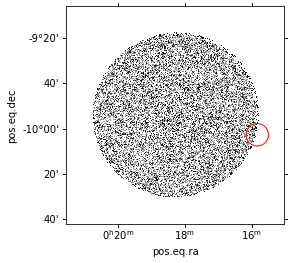

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=WCS(galex_nuv_image[0].header))
ax.imshow(galex_nuv_image[0].data, cmap='gray_r', origin='lower', vmin=0.0, vmax=0.01)
ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')   

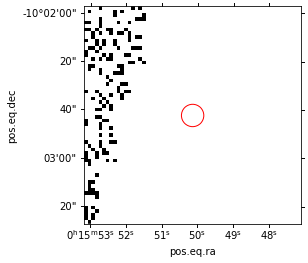

In [24]:
cutout = Cutout2D(galex_nuv_image[0].data, pos, size, wcs=WCS(galex_nuv_image[0].header))

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=cutout.wcs)
ax.imshow(cutout.data, cmap='gray_r', origin='lower', vmin = 0.0, vmax = 0.01)
ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')


## 14. Try visualizing a cutout of an SDSS image that covers your position.

Hints:
* Search the registry using `keywords=['sloan']
* Find the service with a `short_name` of `b'SDSS SIAP'`
* From Known Issues, recall that an empty string must be specified to the `format` parameter dues to a bug in the service.
* After obtaining your search results, select r-band images using the `.title` attribute of the records that are returned, since `.bandpass_id` is not populated.

In [25]:
sdss_image_services = vo.regsearch(keywords=['sloan'], servicetype='image')
sdss_image_services.to_table()['ivoid', 'short_name', 'res_title', 'source_value']

ivoid,short_name,res_title,source_value
object,object,object,object
ivo://irsa.ipac/spitzer/images/shela,SHELA,Spitzer/HETDEX Exploratory Large-Area Survey,
ivo://mast.stsci/siap/al218,VLA.AL218,VLA-A Array AL218 Texas Survey Source Snapshots (AL218),
ivo://mast.stsci/siap/vla-first,VLA-FIRST,VLA Faint Images of the Radio Sky at Twenty Centimeters (FIRST),
ivo://nasa.heasarc/skyview/sdss,SDSS,Sloan Digital Sky Survey g-band,
ivo://nasa.heasarc/skyview/sdssdr7,SDSSDR7,Sloan Digital Sky Survey g-band DR7,
ivo://nasa.heasarc/skyview/stripe82vla,Stripe82VLA,VLA Survey of SDSS Stripe 82,
ivo://org.gavo.dc/bgds/q/sia,bgds sia,Bochum Galactic Disk Survey (BGDS) SIAP service,2015AN....336..590H
ivo://sdss.jhu/services/siap-images,SDSS SIAP,Sloan Digital Sky Survey Images (Latest Release),
ivo://sdss.jhu/services/siapdr1-images,SDSSDR1,Sloan Digital Sky Survey DR1 - Images,


In [26]:
#  Use list comprehension to check each service's short_name attribute.
#   Given the above, we know the first match is the right one.  
sdss_image_service = [s for s in sdss_image_services if 'SDSS SIAP' in s.short_name ][0]
sdss_image_service.short_name

'SDSS SIAP'

As a workaround to a bug in the SDSS service, pass `format=''` when searching.

In [27]:
sdss_image_table = sdss_image_service.search(pos=pos, size=0.0, format='', intersect='covers')
len(sdss_image_table['Title'])

60

In [28]:
for sdss_rband_record in sdss_image_table:
    if 'Sloan Digital Sky Survey - Filter r' in sdss_rband_record.title:
        break
print(sdss_rband_record.title, sdss_rband_record.bandpass_id)

Sloan Digital Sky Survey - Filter r None


In [29]:
##  See above regarding two ways to do this
# sdss_rband_image = fits.open(sdss_rband_record.getdataurl())
file_name = download_file(sdss_rband_record.getdataurl(), cache=True)  
sdss_rband_image=fits.open(file_name)

/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


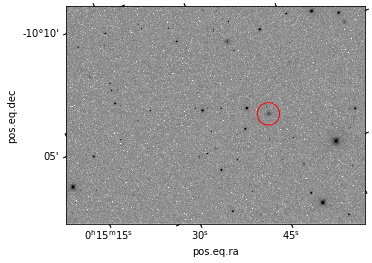

In [30]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=WCS(sdss_rband_image[0].header))

interval = vis.PercentileInterval(99.9)
vmin,vmax = interval.get_limits(sdss_rband_image[0].data)
norm = vis.ImageNormalize(vmin=vmin, vmax=vmax, stretch=vis.LogStretch(1000))
ax.imshow(sdss_rband_image[0].data, cmap = 'gray_r', norm = norm, origin = 'lower')          
ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')

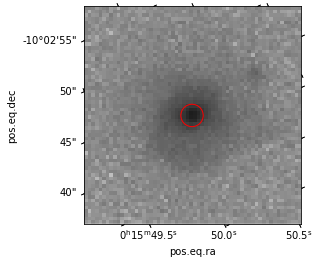

In [31]:
cutout = Cutout2D(sdss_rband_image[0].data, pos, size, wcs=WCS(sdss_rband_image[0].header))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=cutout.wcs)
vmin,vmax = interval.get_limits(sdss_rband_image[0].data)
norm = vis.ImageNormalize(vmin=vmin, vmax=vmax, stretch=vis.LogStretch(1000))
ax.imshow(cutout.data, cmap = 'gray_r', norm = norm, origin = 'lower')          
ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')

## 15. Try looping over all positions and plotting multiwavelength cutouts.

Warning: this cell takes a long time to run! We limit it to the first three galaxies only.

/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


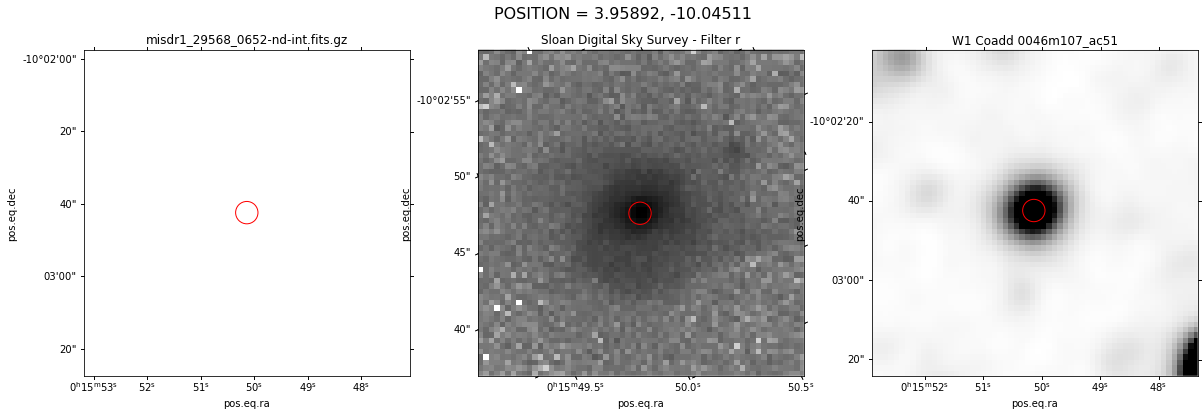

/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


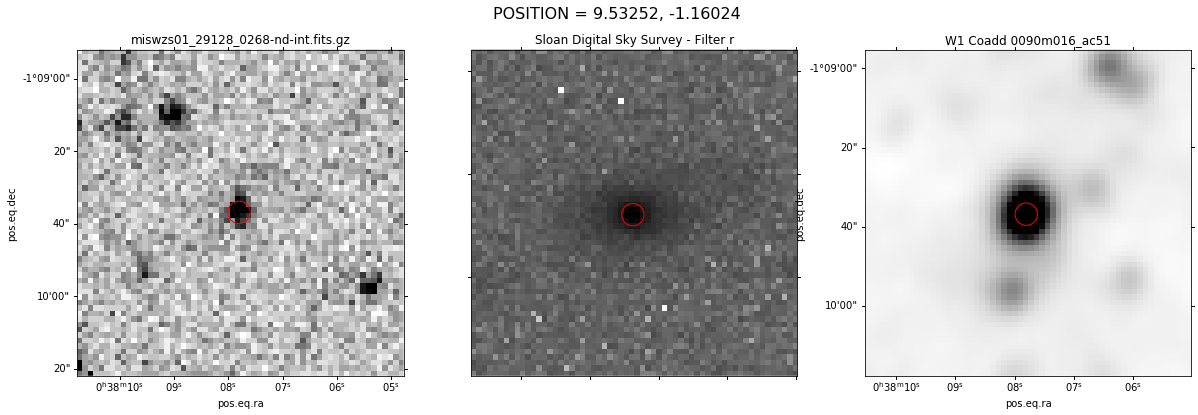

/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/Users/shupe/miniconda3/envs/navo-workshop/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


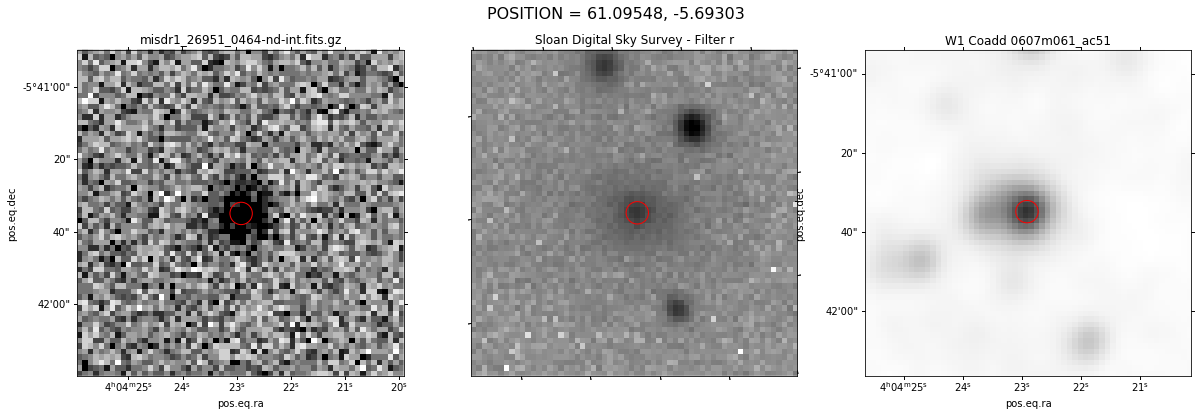

In [32]:
# Pick the first 3 galaxies.
galaxy_subset = galaxies[0:3]

# For each galaxy,
for galaxy in galaxy_subset:

    # Establish the position.
    ra = galaxy['RA']
    dec = galaxy['DEC']
    pos = SkyCoord(ra, dec, unit = 'deg')  
    
    # Set up the plot for this position.
    fig = plt.figure(figsize=(20,6))
    plt.suptitle('POSITION = ' + str(ra) + ', ' + str(dec), fontsize=16)

    # GALEX
    
    # Find the GALEX images that overlap the position.
    galex_image_table = galex_image_service.search(pos=pos, size=0.25)
    
    # Find the GALEX All-Sky Image Survey (AIS) Near-UV FITS coadd. 
    for i in range(len(galex_image_table)):
        if (('image/fits' in galex_image_table[i].format) and
            (galex_image_table['enrValue'][0]==2.35e-07)):
            break
    galex_image_record = galex_image_table[i]
 
    # Create a cutout.
    file_name = download_file(galex_image_record.getdataurl(), cache=True)  
    gimage=fits.open(file_name)
    galex_cutout = Cutout2D(gimage[0].data, pos, size, wcs=WCS(gimage[0].header))
    
    # Plot the cutout in the first position of a 1x3 (rowsxcols) grid.
    ax = fig.add_subplot(1, 3, 1, projection=galex_cutout.wcs)
    ax.set_title(galex_image_record.title)
    ax.imshow(galex_cutout.data, cmap='gray_r', origin='lower', vmin = 0.0, vmax = 0.01)
    ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')
    
    # SDSS
    
    # Find the SDSS images that overlap the position.
    sdss_image_table = sdss_image_service.search(pos=pos, size=0, format='')
    
    # Find the first SDSS r-band image.
    for sdss_rband_record in sdss_image_table:
        if 'Sloan Digital Sky Survey - Filter r' in sdss_rband_record.title:
            break
    file_name = download_file(sdss_rband_record.getdataurl(), cache=True)  
    sdss_rband_image=fits.open(file_name)
    
    # Create a cutout.
    sdss_cutout = Cutout2D(sdss_rband_image[0].data, pos, size,
                           wcs=WCS(sdss_rband_image[0].header))
    
    # Plot the cutout in the second position of a 1x3 grid.
    vmin,vmax = interval.get_limits(sdss_cutout.data)
    norm = vis.ImageNormalize(vmin=vmin, vmax=vmax, stretch=vis.LogStretch(1000))
    ax = fig.add_subplot(1, 3, 2, projection=sdss_cutout.wcs)
    ax.imshow(sdss_cutout.data, cmap = 'gray_r', norm = norm, origin = 'lower')          
    ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')
    ax.set_title(sdss_rband_record.title)
    
    # AllWISE
    
    # Find the AllWISE images that overlap the position.
    allwise_image_table = allwise_image_service.search(pos=pos, size=0)
    
    # Find the AllWISE W1 channel images.
    for allwise_image_record in allwise_image_table:
        if 'W1' in allwise_image_record.bandpass_id:
            break
    file_name = download_file(allwise_image_record.getdataurl(), cache=True)  
    allwise_w1_image=fits.open(file_name)

    
    # Create a cutout.
    allwise_cutout = Cutout2D(allwise_w1_image[0].data, pos, (size, size),
                              wcs=WCS(allwise_w1_image[0].header))

    # Plot the cutout in the third position of a 1x3 grid.
    ax = fig.add_subplot(1, 3, 3, projection=allwise_cutout.wcs)
    ax.imshow(allwise_cutout.data, cmap='gray_r', origin='lower', vmax = 10)
    ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')
    ax.set_title(allwise_image_record.title)
